In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import plotly.express as px 

In [2]:
#Parameters
r=.1
S0 = 100
K=100
T=1
sig=.2
h=.01
dt=.01
M=50000
seed = 0

In [3]:
#Deterministic
def blackScholes(r, S0, K, T, sig, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    d2 = d1 - sig*np.sqrt(T)
    if type == "c":
            price = S0*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
    elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
    return price

def delta_calc(r, S0, K, T, sig, type="c"):
    "Calculate delta of a european option"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
    elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
    return delta_calc

def gamma_calc(r, S0, K, T, sig, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    gamma_calc = norm.pdf(d1, 0, 1)/(S0*sig*np.sqrt(T))
    return gamma_calc

def vega_calc(r, S0, K, T, sig, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    if type == "c":
            vega = S0*norm.pdf(d1, 0, 1)*np.sqrt(T)
    elif type == "p":
            vega = S0*norm.pdf(d1, 0, 1)*np.sqrt(T)
    return vega

def theta_calc(r, S0, K, T, sig, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    d2 = d1 - sig*np.sqrt(T)
   
    if type == "c":
            theta_calc = -S0*norm.pdf(d1,0,1)*sig/(2*np.sqrt(T))-r*K*np.exp(-r*T)*norm.cdf(d2,0,1)
    elif type == "p":
            theta_calc = S0*norm.pdf(d1,0,1)*sig/(2*np.sqrt(T))+r*K*np.exp(-r*T)*norm.cdf(-d2,0,1)
    return theta_calc

def rho_calc(r, S0, K, T, sig, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S0/K) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    d2 = d1 - sig*np.sqrt(T)
    if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2,0,1)
    elif type == "p":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2,0,1)
    return rho_calc

In [4]:
#Finite Differences Deterministic
def delta_forward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S0 + h, K, T, sig, type='c') - func(r, S0, K, T, sig, type='c')) / h

def delta_backward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S , K, T, sigma, type='c') - func(r, S-h, K, T, sigma, type='c')) / h

def delta_central_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S0 + h, K, T, sig, type='c') - func(r, S0-h, K, T, sig, type='c')) / (2*h)

def gamma_forward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S + h, K, T, sigma, type='c') - func(r, S, K, T, sigma, type='c')) / h

def gamma_backward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S , K, T, sigma, type='c') - func(r, S-h, K, T, sigma, type='c')) / h

def gamma_central_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S0 + h, K, T, sig, type='c') - 2 * func(r, S0, K, T, sig, type) + func(r, S0-h, K, T, sig, type='c')) / (h**2)

def vega_forward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S, K, T, sigma+h, type='c') - func(r, S, K, T, sigma, type='c')) / h

def vega_backward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S , K, T, sigma, type='c') - func(r, S, K, T, sigma-h, type='c')) / h

def vega_central_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S0, K, T, sig+h, type='c') - func(r, S0, K, T, sig-h, type='c')) / (2*h)

def theta_forward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S, K, T+h, sigma, type='c') - func(r, S, K, T, sigma, type='c')) / h

def theta_backward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S , K, T, sigma, type='c') - func(r, S, K, T-h, sigma, type='c')) / h

def theta_central_difference(func,r,S0,K,T,sig,h,type="c"):
    return -(func(r, S0, K, T+h, sig, type='c') - func(r, S0, K, T-h, sig, type='c')) / (2*h)

def rho_forward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r+h, S, K, T, sigma, type='c') - func(r, S, K, T, sigma, type='c')) / h

def rho_backward_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r, S , K, T, sigma, type='c') - func(r-h, S, K, T, sigma, type='c')) / h

def rho_central_difference(func,r,S0,K,T,sig,h,type="c"):
    return (func(r+h, S0, K, T, sig, type='c') - func(r-h, S0, K, T, sig, type='c')) / (2*h)

In [5]:
#Finite Differences Monte Carlo with Resimulation
# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def monte_carlo_sim(T, K, S0, r, sig, dt, M,seed):

    seeds = np.random.seed(seed)
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE
    european_call = np.exp(-r*T)*np.mean((payoffs))  
    return  european_call

def calculate_delta(T, K, S0, r, sig, dt, M,seed, epsilon=.01):
    
    sims = []
    for seed in range(1):
        # Option price with initial stock price increased by epsilon
        price_up = monte_carlo_sim(T, K, S0 + epsilon, r, sig, dt, M,seed)
        
        # Option price with initial stock price decreased by epsilon
        price_down = monte_carlo_sim(T, K, S0 - epsilon, r, sig, dt, M,seed)
        
        # Delta calculation using finite difference
        delta = (price_up - price_down) / (2 * epsilon)
        sims = np.append(sims, delta)
      
    
    
    return np.mean(sims)

def calculate_gamma(T, K, S0, r, sig, dt, M,seed, epsilon=.01):
  

    sims = []
    for seed in range(1):
        # Option price with initial stock price increased by epsilon
        gamma_up = monte_carlo_sim(T, K, S0 + epsilon , r, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        gamma_down = monte_carlo_sim(T, K, S0 - epsilon , r, sig, dt, M, seed)
        
        # vega calculation using finite difference
        gamma = (gamma_up -2 * monte_carlo_sim(T, K, S0, r, sig, dt, M, seed) + gamma_down) / (epsilon**2)
        sims = np.append(sims, gamma)
    
    return np.mean(sims)

def calculate_vega(T, K, S0, r, sig, dt, M,seed, epsilon=.01):
  

    sims = []
    for seed in range(1):
        # Option price with initial stock price increased by epsilon
        sig_up = monte_carlo_sim(T, K, S0 , r, sig+ epsilon, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        sig_down = monte_carlo_sim(T, K, S0 , r, sig- epsilon, dt, M, seed)
        
        # vega calculation using finite difference
        vega = (sig_up - sig_down) / (2 * epsilon)
        sims = np.append(sims, vega)
    
    
    return np.mean(sims)

def calculate_theta(T, K, S0, r, sig, dt, M, seed, epsilon=.01):
  

    sims = []
    for seed in range(1):
        # Option price with initial stock price increased by epsilon
        theta_up = monte_carlo_sim(T+ epsilon, K, S0 , r, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        theta_down = monte_carlo_sim(T- epsilon, K, S0 , r, sig, dt, M, seed)
        
        # vega calculation using finite difference
        theta = (theta_up - theta_down) / (2 * epsilon)
        sims = np.append(sims, theta)
    
    
    return np.mean(sims)

def calculate_rho(T, K, S0, r, sig, dt, M, seed, epsilon=.01):
  

    sims = []
    for seed in range(1):
        # Option price with initial stock price increased by epsilon
        rho_up = monte_carlo_sim(T, K, S0 , r+ epsilon, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        rho_down = monte_carlo_sim(T, K, S0 , r- epsilon, sig, dt, M, seed)
        
        # vega calculation using finite difference
        theta = (rho_up - rho_down) / (2 * epsilon)
        sims = np.append(sims, theta)
    
    
    return np.mean(sims)

In [6]:
#Pathwise!
def delta_pw(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)


    delta_payoff = (St[:, -1] > K) * ((St[:, -1]) / S0)

    # Calculate Delta
    delta = np.exp(-r * T) * np.mean(delta_payoff)
    return (delta)

def vega_pw(T, K, S0, r, sig, dt, M):

    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)

    #np.sqrt(T) this term was added and gave a slightly different answer but chat gpt advised against
    vega_payoff = (St[:, -1] > K) * (St[:, -1]*(Zt[:,-1]-T*sig))

    # Calculate theta
    vega = np.exp(-r * T) * np.mean(vega_payoff)
    return vega

def theta_pw(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    idk = r*np.exp(-r*T)*np.mean(payoffs)
    idk2=-np.exp(-r*T)*np.mean((St[:, -1] > K) * (St[:, -1])*((r-sig**2*.5)+(sig*Zt[:,-1])/(2*T)))

    # Calculate theta
    theta = idk+idk2
    return theta

def rho_pw(T, K, S0, r, sig, dt, M):
  
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    rho_payoff = (St[:, -1] > K) * ((St[:, -1]))*T


    # Calculate rho
    #Double Check the derivation here
    rho = np.exp(-r * T) * (np.mean(rho_payoff)-np.mean(payoffs)*T)
    return rho
    

In [7]:
#Likelihood Ratio!
# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def delta_lh(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    #antithetic variates
    rv_matrix_anti = -rv_matrix
    rv_matrix = np.concatenate((rv_matrix,rv_matrix_anti))
    
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE

    ln_ST_over_S0 = np.log(St[:, -1]/S0)
    lh_ratio = (ln_ST_over_S0 - (r - 0.5 * sig**2) * T) / (sig**2 * T * S0)

    return np.mean(lh_ratio*discounted_payoffs)

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def gamma_lh(T, K, S0, r, sig, dt, M):
    
        N =int(T/dt)
        # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
        
        rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
        #antithetic variates
        rv_matrix_anti = -rv_matrix
        rv_matrix = np.concatenate((rv_matrix,rv_matrix_anti))
    
        Zt = rv_matrix.cumsum(axis=1)
        # Simulate M stock price paths with each path has length N: call it matrix St.
        
        #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
        time_steps = np.arange(dt,T+dt,dt)
        
        St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
        payoffs = np.maximum(St[:, -1]-K,0)
        discounted_payoffs = np.exp(-r*T)*payoffs
        
        # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
        # YOUR CODE HERE
        C = (np.log(St[:, -1]/S0) - (r - 0.5 * sig**2) * T) / (np.sqrt(T) * sig)
        lh_ratio = payoffs*(1/(S0**2*sig**2*T))*(C**2-1-sig*np.sqrt(T)*C)
      
    
        return np.exp(-r*T)*np.mean(lh_ratio)

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def vega_lh(T, K, S0, r, sig, dt, M):
   
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    #antithetic variates
    rv_matrix_anti = -rv_matrix
    rv_matrix = np.concatenate((rv_matrix,rv_matrix_anti))
    
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE
    a = -8*r*np.log(St[:, -1]/S0)
    b = (4*np.log(St[:, -1]/S0)**2)/T
    c=4*r**2*T
    d=(-sig**2)*(T*sig**2+4)
    e=4*sig**3

    lh_ratio = (a+b+c+d)/e
    

    return np.mean(lh_ratio*discounted_payoffs)

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def theta_lh(T, K, S0, r, sig, dt, M):
    
  
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    #antithetic variates
    rv_matrix_anti = -rv_matrix
    rv_matrix = np.concatenate((rv_matrix,rv_matrix_anti))
    
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)

    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE

    C = (np.log(St[:, -1]/S0) - (r - 0.5 * sig**2) * T) / (np.sqrt(T) * sig)
    term1 = ((C ** 2)-1)
    term2 = 1/(2 * T)
    term3 = (r - .5 * sig ** 2)/(sig * np.sqrt(T))
    lh_ratio = (term2*term1)+term3*C

    return -np.mean(payoffs*lh_ratio)*np.exp(-r*T)

def rho_lh(T, K, S0, r, sig, dt, M):
    
  
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    #antithetic variates
    rv_matrix_anti = -rv_matrix
    rv_matrix = np.concatenate((rv_matrix,rv_matrix_anti))
    
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    c = (np.log(St[:, -1]/S0)-(r-.5*sig**2)*T)/(sig*np.sqrt(T))
    lh_ratio = payoffs*(np.sqrt(T)/sig)*c
    return np.exp(-r*T)*np.mean(lh_ratio)

In [8]:
#Confidence Intervals for all Methods!
def delta_pw_ci(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)


    delta_payoff = (St[:, -1] > K) * ((St[:, -1]) / S0)
    dc_delta_payoff = np.exp(-r*T)*delta_payoff

    # Calculate Delta
    delta = np.exp(-r * T) * np.mean(delta_payoff)
    ci_up = np.mean(dc_delta_payoff)+1.9599*(np.std(dc_delta_payoff)/np.sqrt(M))
    ci_down = np.mean(dc_delta_payoff)-1.9599*(np.std(dc_delta_payoff)/np.sqrt(M))
    return [ci_up,ci_down]

def vega_pw_ci(T, K, S0, r, sig, dt, M):

    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)

    #np.sqrt(T) this term was added and gave a slightly different answer but chat gpt advised against
    vega_payoff = (St[:, -1] > K) * (St[:, -1]*(Zt[:,-1]-T*sig))
    dc_vega_payoff = np.exp(-r*T)*vega_payoff

    # Calculate theta
    vega = np.exp(-r * T) * np.mean(vega_payoff)
    ci_up = np.mean(dc_vega_payoff)+1.9599*(np.std(dc_vega_payoff)/np.sqrt(M))
    ci_down = np.mean(dc_vega_payoff)-1.9599*(np.std(dc_vega_payoff)/np.sqrt(M))
    return [ci_up,ci_down]

def theta_pw_ci(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    dc_payoffs = np.exp(-r*T)*payoffs
    idk = r*np.exp(-r*T)*np.mean(payoffs)
    idk2=-np.exp(-r*T)*np.mean((St[:, -1] > K) * (St[:, -1])*((r-sig**2*.5)+(sig*Zt[:,-1])/(2*T)))

    # Calculate theta
    theta = idk+idk2

    ci_up = theta+1.9599*(np.std(dc_payoffs)/np.sqrt(M))
    ci_down = theta-1.9599*(np.std(dc_payoffs)/np.sqrt(M))
    
    return [ci_down, ci_up]

def rho_pw_ci(T, K, S0, r, sig, dt, M):
  
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    dc_payoffs = np.exp(-r*T)*payoffs
    
    rho_payoff = (St[:, -1] > K) * ((St[:, -1]))*T


    # Calculate rho
    #Double Check the derivation here
    rho = np.exp(-r * T) * (np.mean(rho_payoff)-np.mean(payoffs)*T)
    ci_up = rho+1.9599*(np.std(dc_payoffs)/np.sqrt(M))
    ci_down = rho-1.9599*(np.std(dc_payoffs)/np.sqrt(M))

    return [ci_up, ci_down]


# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def delta_lh_ci(T, K, S0, r, sig, dt, M):
    
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs

    c = (np.log(St[:, -1]/S0)-(r-.5*sig**2)*T)/(sig*np.sqrt(T))
    lh_ratio = payoffs*(1/(S0*sig*np.sqrt(T)))*c
    lh_delta = np.mean(lh_ratio)*np.exp(-r*T)
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE

    ci_up = lh_delta+1.9599*(np.std(lh_ratio)/np.sqrt(M))
    ci_down = lh_delta-1.9599*(np.std(lh_ratio)/np.sqrt(M))
    
    return [ci_up,ci_down]
    

    # Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def gamma_lh_ci(T, K, S0, r, sig, dt, M):
    
        N =int(T/dt)
        # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
        
        rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
        Zt = rv_matrix.cumsum(axis=1)
        # Simulate M stock price paths with each path has length N: call it matrix St.
        
        #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
        time_steps = np.arange(dt,T+dt,dt)
        
        St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
        payoffs = np.maximum(St[:, -1]-K,0)
        discounted_payoffs = np.exp(-r*T)*payoffs
        
        # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
        # YOUR CODE HERE
        C = (np.log(St[:, -1]/S0) - (r - 0.5 * sig**2) * T) / (np.sqrt(T) * sig)
        lh_ratio = payoffs*(1/(S0**2*sig**2*T))*(C**2-1-sig*np.sqrt(T)*C)
        lh_gamma = np.exp(-r*T)*np.mean(lh_ratio)
        ci_up = lh_gamma+1.9599*(np.std(lh_ratio)/np.sqrt(M))
        ci_down = lh_gamma-1.9599*(np.std(lh_ratio)/np.sqrt(M))
      
    
        return [ ci_up,ci_down]

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def vega_lh_ci(T, K, S0, r, sig, dt, M):
   
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE
    a = -8*r*np.log(St[:, -1]/S0)
    b = (4*np.log(St[:, -1]/S0)**2)/T
    c=4*r**2*T
    d=(-sig**2)*(T*sig**2+4)
    e=4*sig**3

    lh_ratio = (a+b+c+d)/e
    lh_vega =  np.mean(lh_ratio*discounted_payoffs)
    ci_up = lh_vega+1.9599*(np.std(lh_ratio)/np.sqrt(M))
    ci_down = lh_vega-1.9599*(np.std(lh_ratio)/np.sqrt(M))
    
    

    return [ci_up, ci_down]

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def theta_lh_ci(T, K, S0, r, sig, dt, M):
    
  
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(np.round((T/dt)))))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)


    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs

    c = (np.log(St[:, -1]/S0) - (r - 0.5 * sig**2) * T) / (np.sqrt(T) * sig)
    a = (((r-.5*sig**2)/(sig*np.sqrt(T)))*c)
    b = (1/(2*T))*(c**2-1)
    lh_ratio = (payoffs)*(b+a)
    lh_theta = np.mean(lh_ratio)*-np.exp(-r*T)
    ci_up = lh_theta+1.9599*(np.std(lh_ratio)/np.sqrt(M))
    ci_down = lh_theta-1.9599*(np.std(lh_ratio)/np.sqrt(M))
    
    # Calculate the present value of all payoffs, discounting using r (in continuously compounding approach), storing those i a list named "LookbackPut"
    # YOUR CODE HERE


    return [ci_up, ci_down]

# Use Monte Carlo simulation to generate stock prices over the lifetime of the stock
def rho_lh_ci(T, K, S0, r, sig, dt, M):
       
    N =int(T/dt)
    # Simulate all Zi's (Brownian Motion terms) and store them in matrix Zt.
    
    rv_matrix = np.random.normal(0,np.sqrt(dt),size=(M,int(N)))
    Zt = rv_matrix.cumsum(axis=1)
    # Simulate M stock price paths with each path has length N: call it matrix St.
    
    #This time step code is not perfect because it leaves out part of the ending value because of dt size !!!!!!!
    time_steps = np.arange(dt,T+dt,dt)
    
    St = S0 * np.exp((r - 0.5 * sig**2) * time_steps + sig * Zt)
    payoffs = np.maximum(St[:, -1]-K,0)
    discounted_payoffs = np.exp(-r*T)*payoffs

    C = (np.log(St[:, -1]/S0) - (r - 0.5 * sig**2) * T) / (np.sqrt(T) * sig)
    lh_ratio= (np.sqrt(T)*C*payoffs)/sig
    lh_rho = np.mean(lh_ratio)*np.exp(-r*T)
    ci_up = lh_rho+1.9599*(np.std(lh_ratio)/np.sqrt(M))
    ci_down = lh_rho-1.9599*(np.std(lh_ratio)/np.sqrt(M))
   
    
    return [ci_up,ci_down]
    
def calculate_delta_ci(T, K, S0, r, sig, dt, M,seed, epsilon=.01):
    
    sims = []
    for seed in range(100):
        # Option price with initial stock price increased by epsilon
        price_up = monte_carlo_sim(T, K, S0 + epsilon, r, sig, dt, M,seed)
        
        # Option price with initial stock price decreased by epsilon
        price_down = monte_carlo_sim(T, K, S0 - epsilon, r, sig, dt, M,seed)
        
        # Delta calculation using finite difference
        delta = (price_up - price_down) / (2 * epsilon)
        sims = np.append(sims, delta)
      
    ci_up = np.mean(sims)+1.9599*(np.std(sims)/np.sqrt(M))
    ci_down = np.mean(sims)-1.9599*(np.std(sims)/np.sqrt(M))
    
    return [ci_up,ci_down]

def calculate_gamma_ci(T, K, S0, r, sig, dt, M,seed, epsilon=.01):


    sims = []
    for seed in range(100):
        # Option price with initial stock price increased by epsilon
        gamma_up = monte_carlo_sim(T, K, S0 + epsilon , r, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        gamma_down = monte_carlo_sim(T, K, S0 - epsilon , r, sig, dt, M, seed)
        
        # vega calculation using finite difference
        gamma = (gamma_up -2 * monte_carlo_sim(T, K, S0, r, sig, dt, M, seed) + gamma_down) / (epsilon**2)
        sims = np.append(sims, gamma)
    
    ci_up = np.mean(sims)+1.9599*(np.std(sims)/np.sqrt(M))
    ci_down = np.mean(sims)-1.9599*(np.std(sims)/np.sqrt(M))
    
    return [ci_up,ci_down]

def calculate_vega_ci(T, K, S0, r, sig, dt, M,seed, epsilon=.01):
  

    sims = []
    for seed in range(100):
        # Option price with initial stock price increased by epsilon
        sig_up = monte_carlo_sim(T, K, S0 , r, sig+ epsilon, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        sig_down = monte_carlo_sim(T, K, S0 , r, sig- epsilon, dt, M, seed)
        
        # vega calculation using finite difference
        vega = (sig_up - sig_down) / (2 * epsilon)
        sims = np.append(sims, vega)
    
    ci_up = np.mean(sims)+1.9599*(np.std(sims)/np.sqrt(M))
    ci_down = np.mean(sims)-1.9599*(np.std(sims)/np.sqrt(M))
    
    return [ci_up,ci_down]

def calculate_theta_ci(T, K, S0, r, sig, dt, M, seed, epsilon=.01):
  

    sims = []
    for seed in range(100):
        # Option price with initial stock price increased by epsilon
        theta_up = monte_carlo_sim(T+ epsilon, K, S0 , r, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        theta_down = monte_carlo_sim(T- epsilon, K, S0 , r, sig, dt, M, seed)
        
        # vega calculation using finite difference
        theta = (theta_up - theta_down) / (2 * epsilon)
        sims = np.append(sims, theta)
    ci_up = np.mean(sims)+1.9599*(np.std(sims)/np.sqrt(M))
    ci_down = np.mean(sims)-1.9599*(np.std(sims)/np.sqrt(M))
    
    return [ci_up,ci_down]

def calculate_rho_ci(T, K, S0, r, sig, dt, M, seed, epsilon=.01):
  

    sims = []
    for seed in range(100):
        # Option price with initial stock price increased by epsilon
        rho_up = monte_carlo_sim(T, K, S0 , r+ epsilon, sig, dt, M, seed)
        
        # Option price with initial stock price decreased by epsilon
        rho_down = monte_carlo_sim(T, K, S0 , r- epsilon, sig, dt, M, seed)
        
        # vega calculation using finite difference
        theta = (rho_up - rho_down) / (2 * epsilon)
        sims = np.append(sims, theta)
        
    ci_up = np.mean(sims)+1.9599*(np.std(sims)/np.sqrt(M))
    ci_down = np.mean(sims)-1.9599*(np.std(sims)/np.sqrt(M))
    
    return [ci_up,ci_down]

    
 
   

In [9]:
#Dataframe with data from LH Ratio and Pathwise and Deterministic
M = 10000
# initialize list of lists
Pathwise = np.array([delta_pw(T, K, S0, r, sig, dt, M), 0, vega_pw(T, K, S0, r, sig, dt, M),theta_pw(T, K, S0, r, sig, dt, M),rho_pw(T, K, S0, r, sig, dt, M)])
LH_Ratio = np.array([delta_lh(T, K, S0, r, sig, dt, M),gamma_lh(T, K, S0, r, sig, dt, M),vega_lh(T, K, S0, r, sig, dt, M),theta_lh(T, K, S0, r, sig, dt, M),rho_lh(T, K, S0, r, sig, dt, M)])
Finite_Diff = np.array([delta_central_difference(blackScholes,r,S0,K,T,sig,h,type="c"),gamma_central_difference(blackScholes,r,S0,K,T,sig,h,type="c"),vega_central_difference(blackScholes,r,S0,K,T,sig,h,type="c"),theta_central_difference(blackScholes,r,S0,K,T,sig,h,type="c"),rho_central_difference(blackScholes,r,S0,K,T,sig,h,type="c")])
Monte_Carlo_FD = np.array([calculate_delta(T, K, S0, r, sig, dt, M,seed, epsilon=.01),calculate_gamma(T, K, S0, r, sig, dt, M,seed, epsilon=.01),calculate_vega(T, K, S0, r, sig, dt, M,seed, epsilon=.01),calculate_theta(T, K, S0, r, sig, dt, M, seed, epsilon=.01),calculate_rho(T, K, S0, r, sig, dt, M, seed, epsilon=.01)])
Deterministic = np.array([delta_calc(r, S0, K, T, sig, type="c"), gamma_calc(r, S0, K, T, sig, type="c"), vega_calc(r, S0, K, T, sig, type="c"),theta_calc(r, S0, K, T, sig, type="c"),rho_calc(r, S0, K, T, sig, type="c")])
Error_LH =  np.abs(np.add(-abs(LH_Ratio), abs(Deterministic)))
Error_PW =   np.abs(np.add(-abs(Pathwise), abs(Deterministic)))
Error_FD =  np.abs(np.add(-abs(Finite_Diff), abs(Deterministic)))
Error_MC_FD = np.abs(np.add(-abs(Monte_Carlo_FD),abs(Deterministic)))
Greeks = ['Delta','Gamma','Vega','Theta','Rho']
list_of_tuples = list(zip(Greeks, Deterministic, Finite_Diff, Monte_Carlo_FD,LH_Ratio , Pathwise,Error_PW,Error_LH,Error_FD,Error_MC_FD))
 
# Create the pandas DataFrame
df = pd.DataFrame(data = list_of_tuples, columns=['Greeks','Deterministic','Finite_Diff','Monte_Carlo_FD','LH_Ratio', 'Pathwise','Error_PW','Error_LH','Error_FD','Error_MC_FD'])
df


,Greeks,Deterministic,Finite_Diff,Monte_Carlo_FD,LH_Ratio,Pathwise,Error_PW,Error_LH,Error_FD,Error_MC_FD
0,Delta,0.725747,0.725747,0.730833,0.729216,0.730751,0.005004,0.003469,1.110660e-08,0.005086
1,Gamma,0.016661,0.016661,0.020791,0.017598,0.000000,0.016661,0.000937,4.647182e-11,0.004129
2,Vega,33.322460,33.312689,33.884651,33.271910,33.054357,0.268103,0.050551,9.770881e-03,0.562191
3,Theta,-9.262747,-9.262793,2.780858,-10.626006,-9.232079,0.030668,1.363259,4.577591e-05,6.481889
4,Rho,59.305012,59.294895,59.614754,72.437504,59.339238,0.034226,13.132492,1.011615e-02,0.309742


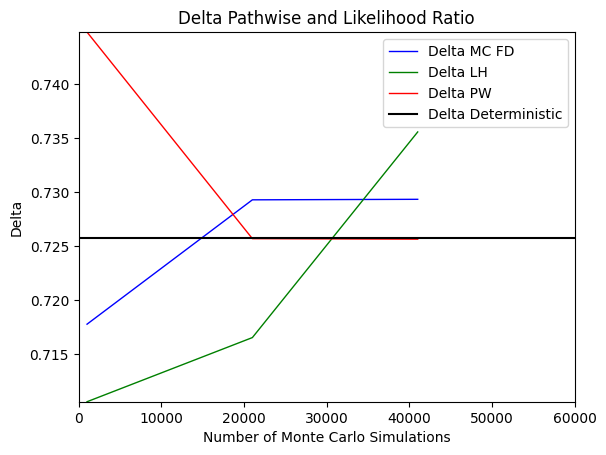

In [10]:
sims = np.arange(1000,60000,20000)

deltas = []
for M in sims:
    delta =  delta_lh(T, K, S0, r, sig, dt, M)
    deltas = np.append(delta,deltas)

deltas_pw = []
for M in sims:
    delta = delta_pw(T, K, S0, r, sig, dt, M)
    deltas_pw = np.append(delta,deltas_pw)


deltas_MC_FD =[]
for M in sims:
    delta = calculate_delta(T, K, S0, r, sig, dt, M, seed, epsilon=.01)
    deltas_MC_FD = np.append(delta,deltas_MC_FD)

a = deltas_MC_FD

        
# x axis values
x = sims
# corresponding y axis values
y = deltas[::-1]

z = deltas_pw[::-1]

a = deltas_MC_FD[::-1]

b = np.concatenate((deltas,deltas_pw,deltas_MC_FD))

# plotting the points 
plt.plot(x, a, label = "Delta MC FD", color='blue', linewidth = 1)
plt.plot(x, y, label = "Delta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Delta PW", color='red', linewidth = 1)
plt.axhline(y=delta_calc(r, S0, K, T, sig, type="c"), color='black', linestyle='-')




# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,60000)

# naming the x axis
plt.xlabel('Number of Monte Carlo Simulations')
# naming the y axis
plt.ylabel('Delta')
 
# giving a title to my graph
plt.title('Delta Pathwise and Likelihood Ratio')
 
# function to show the plot
plt.legend(["Delta MC FD", "Delta LH", "Delta PW",'Delta Deterministic'])
plt.show()



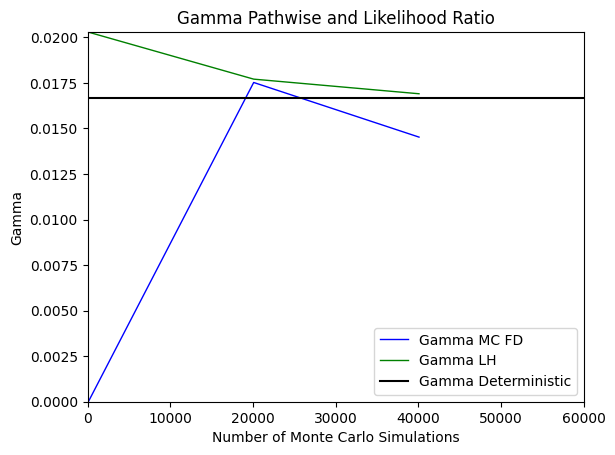

In [11]:
sims = np.arange(100,60000,20000)

gammas = []
for M in sims:
    gamma =  gamma_lh(T, K, S0, r, sig, dt, M)
    gammas = np.append(gamma,gammas)

gammas_MC_FD =[]
for M in sims:
    gamma = calculate_gamma(T, K, S0, r, sig, dt, M, seed, epsilon=.01)
    gammas_MC_FD = np.append(gamma,gammas_MC_FD)


        
# x axis values
x = sims
# corresponding y axis values
y = gammas[::-1]

a = gammas_MC_FD[::-1]

b = np.concatenate((gammas_MC_FD,gammas))

# plotting the points 
plt.plot(x, a, label = "Gamma MC FD", color='blue', linewidth = 1)
plt.plot(x, y, label = "Gamma LH", color='green', linewidth = 1)
plt.axhline(y=gamma_calc(r, S0, K, T, sig, type="c"), color='black', linestyle='-')

# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,60000)

# naming the x axis
plt.xlabel('Number of Monte Carlo Simulations')
# naming the y axis
plt.ylabel('Gamma')
 
# giving a title to my graph
plt.title('Gamma Pathwise and Likelihood Ratio')
 
# function to show the plot
plt.legend(["Gamma MC FD", "Gamma LH",'Gamma Deterministic'])
plt.show()



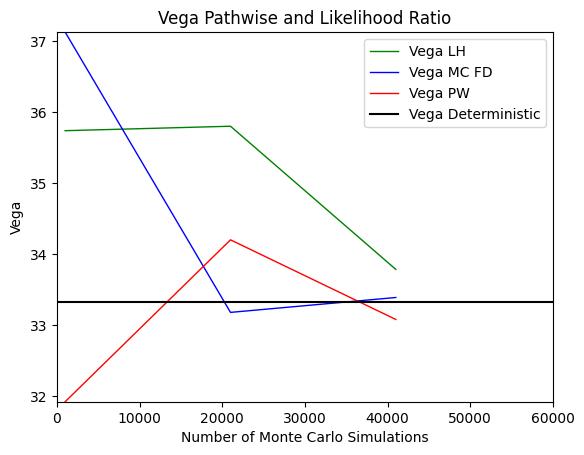

In [12]:
sims = np.arange(1000,60000,20000)

vegas = []
for M in sims:
    vega =  vega_lh(T, K, S0, r, sig, dt, M)
    vegas = np.append(vega,vegas)

vegas_pw = []
for M in sims:
    vega = vega_pw(T, K, S0, r, sig, dt, M)
    vegas_pw = np.append(vega,vegas_pw)


vegas_MC_FD =[]
for M in sims:
    vega = calculate_vega(T, K, S0, r, sig, dt, M, seed, epsilon=.01)
    vegas_MC_FD = np.append(vega,vegas_MC_FD)

a = vegas_MC_FD

b = np.concatenate((vegas,vegas_pw,vegas_MC_FD))
# x axis values
x = sims
# corresponding y axis values
y = vegas[::-1]

z = vegas_pw[::-1]

a = vegas_MC_FD[::-1]

# plotting the points 
plt.plot(x, y, label = "Vega LH", color='green', linewidth = 1)
plt.plot(x, a, label = "Vega MC FD", color='blue', linewidth = 1)
plt.plot(x, z, label = "Vega PW", color='red', linewidth = 1)
plt.axhline(y=vega_calc(r, S0, K, T, sig, type="c"), color='black', linestyle='-')




# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,60000)

# naming the x axis
plt.xlabel('Number of Monte Carlo Simulations')
# naming the y axis
plt.ylabel('Vega')
 
# giving a title to my graph
plt.title('Vega Pathwise and Likelihood Ratio')
 
# function to show the plot
plt.legend(["Vega LH","Vega MC FD", "Vega PW",'Vega Deterministic'])
plt.show()



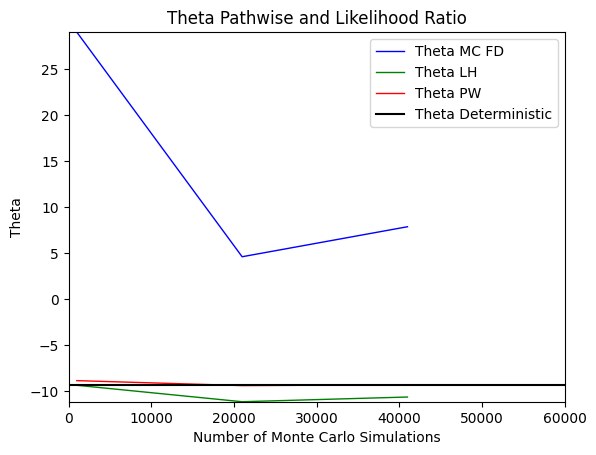

In [13]:
sims = np.arange(1000,60000,20000)

thetas = []
for M in sims:
    theta =  theta_lh(T, K, S0, r, sig, dt, M)
    thetas = np.append(theta,thetas)

thetas_pw = []
for M in sims:
    theta = theta_pw(T, K, S0, r, sig, dt, M)
    thetas_pw = np.append(theta,thetas_pw)


thetas_MC_FD =[]
for M in sims:
    theta = calculate_theta(T, K, S0, r, sig, dt, M, seed, epsilon=.01)
    thetas_MC_FD = np.append(theta,thetas_MC_FD)

a = thetas_MC_FD

        
# x axis values
x = sims
# corresponding y axis values
y = thetas[::-1]

z = thetas_pw[::-1]

a = thetas_MC_FD[::-1]

b = np.concatenate((thetas,thetas_pw,thetas_MC_FD))
# plotting the points 
plt.plot(x, a, label = "Theta MC FD", color='blue', linewidth = 1)
plt.plot(x, y, label = "Theta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Theta PW", color='red', linewidth = 1)
plt.axhline(y=theta_calc(r, S0, K, T, sig, type="c"), color='black', linestyle='-')




# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,60000)

# naming the x axis
plt.xlabel('Number of Monte Carlo Simulations')
# naming the y axis
plt.ylabel('Theta')
 
# giving a title to my graph
plt.title('Theta Pathwise and Likelihood Ratio')
 
# function to show the plot
plt.legend(["Theta MC FD", "Theta LH", "Theta PW",'Theta Deterministic'])
plt.show()



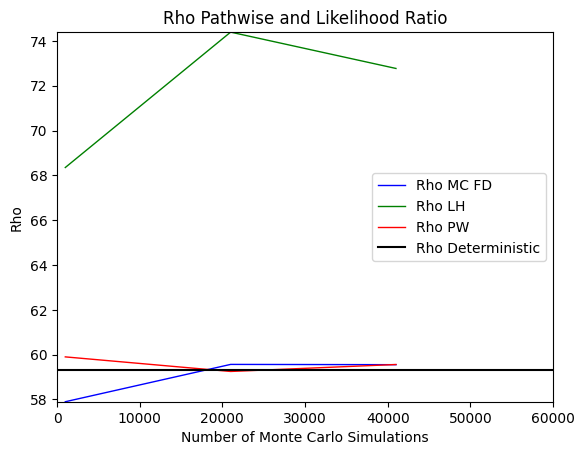

In [14]:
sims = np.arange(1000,60000,20000)

rhos = []
for M in sims:
    rho =  rho_lh(T, K, S0, r, sig, dt, M)
    rhos = np.append(rho,rhos)

rhos_pw = []
for M in sims:
    rho = rho_pw(T, K, S0, r, sig, dt, M)
    rhos_pw = np.append(rho,rhos_pw)


rhos_MC_FD =[]
for M in sims:
    rho = calculate_rho(T, K, S0, r, sig, dt, M, seed, epsilon=.01)
    rhos_MC_FD = np.append(rho,rhos_MC_FD)

a = deltas_MC_FD

b = np.concatenate((rhos,rhos_pw,rhos_MC_FD))
        
# x axis values
x = sims
# corresponding y axis values
y = rhos[::-1]

z = rhos_pw[::-1]

a = rhos_MC_FD[::-1]

# plotting the points 
plt.plot(x, a, label = "Rho MC FD", color='blue', linewidth = 1)
plt.plot(x, y, label = "Rho LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Rho PW", color='red', linewidth = 1)
plt.axhline(y=rho_calc(r, S0, K, T, sig, type="c"), color='black', linestyle='-')




# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,60000)

# naming the x axis
plt.xlabel('Number of Monte Carlo Simulations')
# naming the y axis
plt.ylabel('Rho')
 
# giving a title to my graph
plt.title('Rho Pathwise and Likelihood Ratio')
 
# function to show the plot
plt.legend(["Rho MC FD", "Rho LH", "Rho PW","Rho Deterministic"])
plt.show()



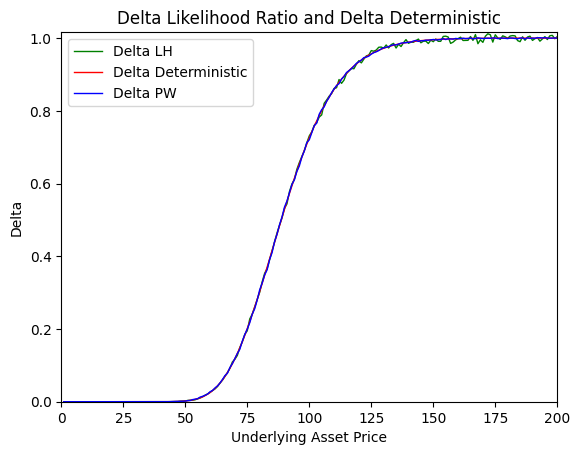

In [15]:
sims = np.arange(1,250,1)

deltas = []
for S0 in sims:
    delta =  delta_lh(T, K, S0, r, sig, dt, M)
    deltas = np.append(delta,deltas)

deltas_det = []
for S0 in sims:
    delta =  delta_calc(r, S0, K, T, sig, type="c")
    deltas_det = np.append(delta,deltas_det)

deltas_pw = []
for S0 in sims:
    delta = delta_pw(T, K, S0, r, sig, dt, M)
    deltas_pw = np.append(delta,deltas_pw)

        
# x axis values
x = sims
# corresponding y axis values
y = deltas[::-1]

z = deltas_det[::-1]

a = deltas_pw[::-1]

b = np.concatenate((deltas,deltas_det))
# plotting the points 
plt.plot(x, y, label = "Delta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Delta Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Delta PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,200)

# naming the x axis
plt.xlabel('Underlying Asset Price')
# naming the y axis
plt.ylabel('Delta')
 
# giving a title to my graph
plt.title('Delta Likelihood Ratio and Delta Deterministic')
 
# function to show the plot
plt.legend(["Delta LH", 'Delta Deterministic','Delta PW'])
plt.show()



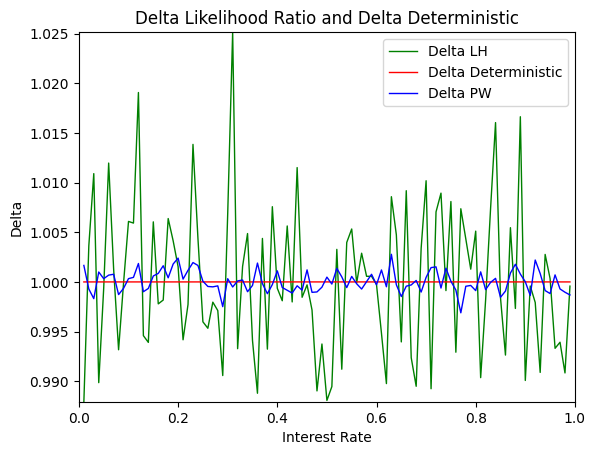

In [16]:
sims = np.arange(.01,1,.01)

deltas = []
for r in sims:
    delta =  delta_lh(T, K, S0, r, sig, dt, M)
    deltas = np.append(delta,deltas)

deltas_det = []
for r in sims:
    delta =  delta_calc(r, S0, K, T, sig, type="c")
    deltas_det = np.append(delta,deltas_det)

deltas_pw = []
for r in sims:
    delta = delta_pw(T, K, S0, r, sig, dt, M)
    deltas_pw = np.append(delta,deltas_pw)

        
# x axis values
x = sims
# corresponding y axis values
y = deltas[::-1]

z = deltas_det[::-1]

a = deltas_pw[::-1]

b = np.concatenate((deltas,deltas_det))
# plotting the points 
plt.plot(x, y, label = "Delta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Delta Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Delta PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,1)

# naming the x axis
plt.xlabel('Interest Rate')
# naming the y axis
plt.ylabel('Delta')
 
# giving a title to my graph
plt.title('Delta Likelihood Ratio and Delta Deterministic')
 
# function to show the plot
plt.legend(["Delta LH", 'Delta Deterministic','Delta PW'])
plt.show()



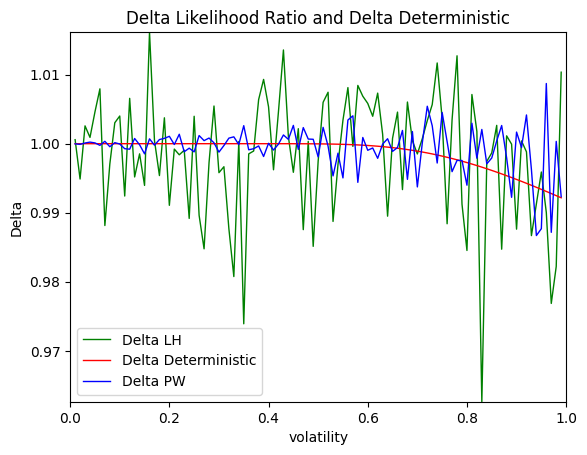

In [17]:
sims = np.arange(.01,1,.01)

deltas = []
for sig in sims:
    delta =  delta_lh(T, K, S0, r, sig, dt, M)
    deltas = np.append(delta,deltas)

deltas_det = []
for sig in sims:
    delta =  delta_calc(r, S0, K, T, sig, type="c")
    deltas_det = np.append(delta,deltas_det)

deltas_pw = []
for sig in sims:
    delta = delta_pw(T, K, S0, r, sig, dt, M)
    deltas_pw = np.append(delta,deltas_pw)

        
# x axis values
x = sims
# corresponding y axis values
y = deltas[::-1]

z = deltas_det[::-1]

a = deltas_pw[::-1]

b = np.concatenate((deltas,deltas_det))
# plotting the points 
plt.plot(x, y, label = "Delta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Delta Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Delta PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,1)

# naming the x axis
plt.xlabel('volatility')
# naming the y axis
plt.ylabel('Delta')
 
# giving a title to my graph
plt.title('Delta Likelihood Ratio and Delta Deterministic')
 
# function to show the plot
plt.legend(["Delta LH", 'Delta Deterministic','Delta PW'])
plt.show()



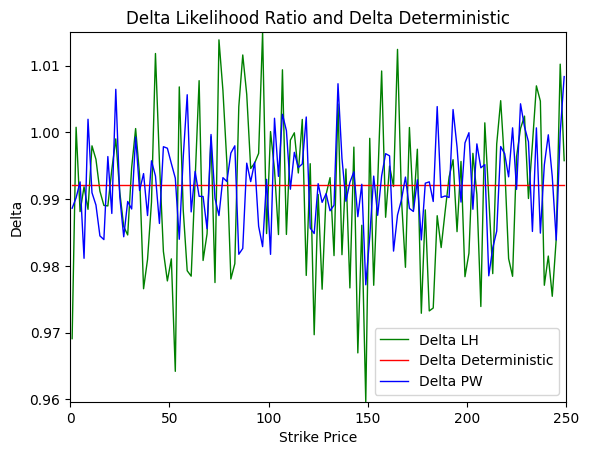

In [18]:
sims = np.arange(1,250,2)

deltas = []
for k in sims:
    delta =  delta_lh(T, K, S0, r, sig, dt, M)
    deltas = np.append(delta,deltas)

deltas_det = []
for k in sims:
    delta =  delta_calc(r, S0, K, T, sig, type="c")
    deltas_det = np.append(delta,deltas_det)

deltas_pw = []
for k in sims:
    delta = delta_pw(T, K, S0, r, sig, dt, M)
    deltas_pw = np.append(delta,deltas_pw)

        
# x axis values
x = sims
# corresponding y axis values
y = deltas[::-1]

z = deltas_det[::-1]

a = deltas_pw[::-1]

b = np.concatenate((deltas,deltas_det))
# plotting the points 
plt.plot(x, y, label = "Delta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Delta Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Delta PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,250)

# naming the x axis
plt.xlabel('Strike Price')
# naming the y axis
plt.ylabel('Delta')
 
# giving a title to my graph
plt.title('Delta Likelihood Ratio and Delta Deterministic')
 
# function to show the plot
plt.legend(["Delta LH", 'Delta Deterministic','Delta PW'])
plt.show()



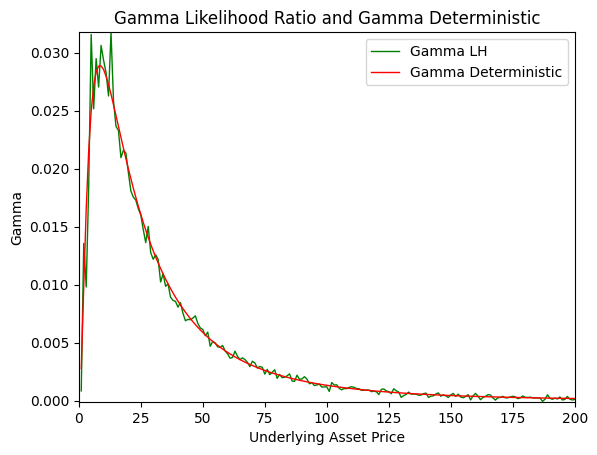

In [19]:
sims = np.arange(1,250,1)

gammas = []
for S0 in sims:
    gamma =  gamma_lh(T, K, S0, r, sig, dt, M)
    gammas = np.append(gammas,gamma)

gammas_det = []
for S0 in sims:
    gamma =  gamma_calc(r, S0, K, T, sig, type="c")
    gammas_det = np.append(gamma,gammas_det)




        
# x axis values
x = sims
# corresponding y axis values
y = gammas[::-1]

z = gammas_det[::-1]



b = np.concatenate((gammas,gammas_det))
# plotting the points 
plt.plot(x, gammas, label = "Gamma LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Gamma Det", color='red', linewidth = 1)



# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,200)

# naming the x axis
plt.xlabel('Underlying Asset Price')
# naming the y axis
plt.ylabel('Gamma')
 
# giving a title to my graph
plt.title('Gamma Likelihood Ratio and Gamma Deterministic')
 
# function to show the plot
plt.legend(["Gamma LH", 'Gamma Deterministic'])
plt.show()



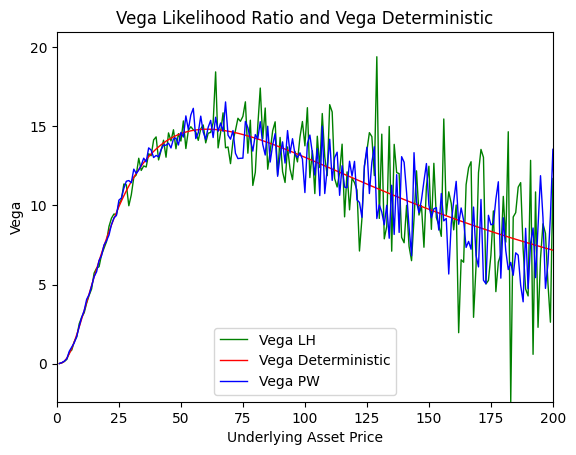

In [20]:
sims = np.arange(1,250,1)

vegas = []
for S0 in sims:
    vega =  vega_lh(T, K, S0, r, sig, dt, M)
    vegas = np.append(vega,vegas)

vegas_det = []
for S0 in sims:
    vega =  vega_calc(r, S0, K, T, sig, type="c")
    vegas_det = np.append(vega,vegas_det)

vegas_pw = []
for S0 in sims:
    vega = vega_pw(T, K, S0, r, sig, dt, M)
    vegas_pw = np.append(vega,vegas_pw)


        
# x axis values
x = sims
# corresponding y axis values
y = vegas[::-1]

z = vegas_det[::-1]

a = vegas_pw[::-1]

b = np.concatenate((vegas,vegas_det))
# plotting the points 
plt.plot(x, y, label = "Vega LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Vega Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Vega PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,200)

# naming the x axis
plt.xlabel('Underlying Asset Price')
# naming the y axis
plt.ylabel('Vega')
 
# giving a title to my graph
plt.title('Vega Likelihood Ratio and Vega Deterministic')
 
# function to show the plot
plt.legend(["Vega LH", 'Vega Deterministic','Vega PW'])
plt.show()



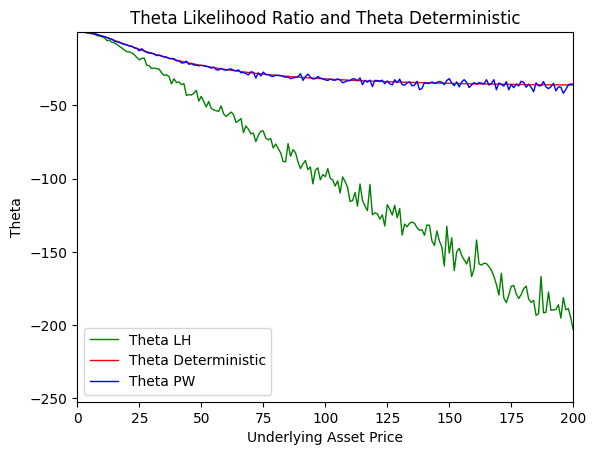

In [21]:
sims = np.arange(1,250,1)
M=10000
thetas = []
for S0 in sims:
    theta =  theta_lh(T, K, S0, r, sig, dt, M)
    thetas = np.append(theta,thetas)

thetas_det = []
for S0 in sims:
    theta =  theta_calc(r, S0, K, T, sig, type="c")
    thetas_det = np.append(theta,thetas_det)

thetas_pw = []
for S0 in sims:
    theta = theta_pw(T, K, S0, r, sig, dt, M)
    thetas_pw = np.append(theta,thetas_pw)

        
# x axis values
x = sims
# corresponding y axis values
y = thetas[::-1]

z = thetas_det[::-1]

a = thetas_pw[::-1]

b = np.concatenate((thetas,thetas_det))
# plotting the points 
plt.plot(x, y, label = "Theta LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Theta Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Theta PW", color='Blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,200)

# naming the x axis
plt.xlabel('Underlying Asset Price')
# naming the y axis
plt.ylabel('Theta')
 
# giving a title to my graph
plt.title('Theta Likelihood Ratio and Theta Deterministic')
 
# function to show the plot
plt.legend(["Theta LH", 'Theta Deterministic','Theta PW'])
plt.show()



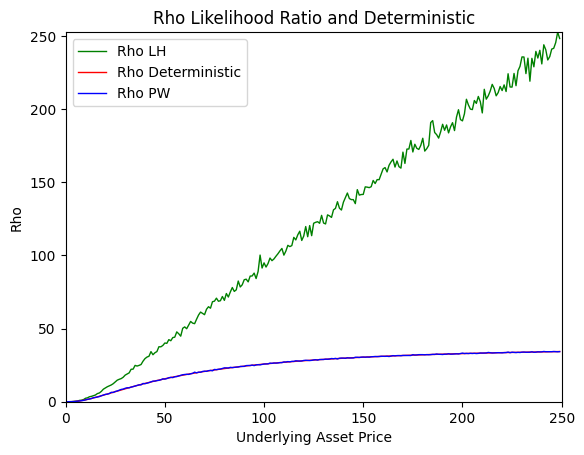

In [22]:
sims = np.arange(1,250,1)
M= 10000
rhos = []
for S0 in sims:
    rho =  rho_lh(T, K, S0, r, sig, dt, M)
    rhos = np.append(rho,rhos)

rhos_det = []
for S0 in sims:
    rho =  rho_calc(r, S0, K, T, sig, type="c")
    rhos_det = np.append(rho,rhos_det)

rhos_pw = []
for S0 in sims:
    rho = rho_pw(T, K, S0, r, sig, dt, M)
    rhos_pw = np.append(rho,rhos_pw)


        
# x axis values
x = sims
# corresponding y axis values
y = rhos[::-1]

z = rhos_det[::-1]

a = rhos_pw[::-1]

b = np.concatenate((rhos,rhos_det))
# plotting the points 
plt.plot(x, y, label = "Rho LH", color='green', linewidth = 1)
plt.plot(x, z, label = "Rho Det", color='red', linewidth = 1)
plt.plot(x, a, label = "Rho PW", color='blue', linewidth = 1)


# setting x and y axis range
plt.ylim(np.min(b),np.max(b))
plt.xlim(0,250)

# naming the x axis
plt.xlabel('Underlying Asset Price')
# naming the y axis
plt.ylabel('Rho')
 
# giving a title to my graph
plt.title('Rho Likelihood Ratio and Deterministic')
 
# function to show the plot
plt.legend(["Rho LH", 'Rho Deterministic','Rho PW'])
plt.show()